# Project 1: Analysis of job market data to explore the open positions related to the jobs in the field of data or machine learning in a particular region

1.Collect and use job market data to explore data related positions or machine learning related
positions in a particular region (e.g., US, India). Suggested websites for this assignment are: -
Indeed
- Glassdoor
- Naukri
- Monster
You will have to use appropriate keywords (for e.g., “data scientist”, “data engineer”, “ML
engineer”) to extract information on the positions available on websites of your choice.
While it is not compulsory to do so, you could use web scraping techniques introduced in this
course to collect data from these websites. Also, note that you are not limited to the sites
mentioned above. Identity one job that you aspire to transition into and identify the skills
required for the job


In [3]:
 pip install python-jobspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: NUMPY
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


since the scope of the Project Part 1 A is to create a report and not find out techniques as how we can scrape , i went with a open source tool that does the job for me .

**Choice of Tool and approach **
1. https://github.com/Bunsly/JobSpy , jobspy seemed to be a good tool to collect the required data
2. based on supported web pages that the tools scrapes ["indeed", "linkedin", "zip_recruiter", "glassdoor"]
3. tried to get the data from all the supported websites and did a df.info() to check 'non-Null counts'.
4. glassdoor seems to have the a better dataset that can be reported on
5. found out all the countries that indeed/glassdoor supports
6. then created the below to loop thru all the countries and create one csv file

In [4]:
import csv
import pandas as pd
from jobspy import scrape_jobs

# List of valid countries
countries = [
    'argentina', 'australia', 'austria', 'bahrain', 'belgium', 'brazil', 'canada', 'chile', 'china', 'colombia',
    'costa rica', 'czech republic', 'czechia', 'denmark', 'ecuador', 'egypt', 'finland', 'france', 'germany',
    'greece', 'hong kong', 'hungary', 'india', 'indonesia', 'ireland', 'israel', 'italy', 'japan', 'kuwait',
    'luxembourg', 'malaysia', 'mexico', 'morocco', 'netherlands', 'new zealand', 'nigeria', 'norway', 'oman',
    'pakistan', 'panama', 'peru', 'philippines', 'poland', 'portugal', 'qatar', 'romania', 'saudi arabia',
    'singapore', 'south africa', 'south korea', 'spain', 'sweden', 'switzerland', 'taiwan', 'thailand', 'turkey',
    'ukraine', 'united arab emirates', 'uk', 'united kingdom', 'usa', 'us', 'united states', 'uruguay', 'venezuela',
    'vietnam', 'usa/ca', 'worldwide'
]

# Site name to scrape from
site_name = 'glassdoor'

# Search term
search_term = "machine learning"

# Initialize an empty DataFrame to store all jobs
all_jobs_df = pd.DataFrame()

# Iterate through all countries and scrape jobs
for ct in countries:
    try:
        jobs = scrape_jobs(
            site_name=[site_name],
            search_term=search_term,
            location=ct,
            results_wanted=500000,
            country_indeed=ct  # only needed for indeed / glassdoor
        )
        print(f"Found {len(jobs)} jobs in {ct}")

        if len(jobs) > 0:
            jobs_df = pd.DataFrame(jobs)
            jobs_df['country'] = ct  # Add country column to identify the source country
            all_jobs_df = pd.concat([all_jobs_df, jobs_df], ignore_index=True)
    except Exception as e:
        print(f"Failed to scrape jobs for {ct}: {e}")

# Save all jobs to a CSV file
all_jobs_df.to_csv(f"jobs-{site_name}-all_countries.csv", quoting=csv.QUOTE_NONNUMERIC, escapechar="\\", index=False)
print(f"Total jobs found: {len(all_jobs_df)}")


2024-08-01 04:58:41,329 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 04:58:44,468 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 04:58:47,408 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 04:58:50,343 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 04:58:53,924 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 04:58:57,800 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 04:59:00,633 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 04:59:03,787 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 04:59:05,443 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 04:59:05,886 - JobSpy - INFO - Glassdoor finished scraping


Found 224 jobs in argentina


2024-08-01 04:59:07,762 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 04:59:10,898 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 04:59:13,833 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 04:59:16,537 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 04:59:19,505 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 04:59:23,371 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 04:59:26,224 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 04:59:28,967 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 04:59:31,820 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 04:59:34,682 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 04:59:38,301 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 04:59:41,043 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 04:59:44,029 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 04:59:46,862 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 04:59:49,684 - JobSpy - INFO - Glassdoor searc

Found 422 jobs in australia


2024-08-01 04:59:54,255 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 04:59:56,959 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 04:59:59,595 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:00:02,016 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:00:04,644 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:00:08,341 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:00:11,064 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:00:13,579 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:00:14,018 - JobSpy - INFO - Glassdoor finished scraping


Found 205 jobs in austria
Failed to scrape jobs for bahrain: Glassdoor is not available for BAHRAIN


<ipython-input-4-b61d303295af>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_jobs_df = pd.concat([all_jobs_df, jobs_df], ignore_index=True)
2024-08-01 05:00:15,679 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:00:18,252 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:00:22,034 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:00:25,751 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:00:28,383 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:00:30,894 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:00:33,368 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:00:36,408 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:00:40,601 - JobSpy - INFO - Glassdoor search page: 9

Found 507 jobs in belgium


2024-08-01 05:01:10,161 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:01:13,702 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:01:16,186 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:01:19,165 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:01:21,607 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:01:24,577 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:01:28,301 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:01:30,932 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:01:32,760 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:01:35,371 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:01:37,917 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:01:41,332 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:01:44,699 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:01:47,270 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:01:49,982 - JobSpy - INFO - Glassdoor searc

Found 800 jobs in brazil


2024-08-01 05:02:33,832 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:02:36,266 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:02:38,871 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:02:41,706 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:02:45,410 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:02:48,775 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:02:51,509 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:02:54,073 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:02:56,205 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:02:58,851 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:03:03,272 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:03:05,355 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:03:08,538 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:03:11,391 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:03:14,479 - JobSpy - INFO - Glassdoor searc

Found 811 jobs in canada
Failed to scrape jobs for chile: Glassdoor is not available for CHILE
Failed to scrape jobs for china: Glassdoor is not available for CHINA
Failed to scrape jobs for colombia: Glassdoor is not available for COLOMBIA
Failed to scrape jobs for costa rica: Glassdoor is not available for COSTARICA
Failed to scrape jobs for czech republic: Glassdoor is not available for CZECHREPUBLIC
Failed to scrape jobs for czechia: Glassdoor is not available for CZECHREPUBLIC
Failed to scrape jobs for denmark: Glassdoor is not available for DENMARK
Failed to scrape jobs for ecuador: Glassdoor is not available for ECUADOR
Failed to scrape jobs for egypt: Glassdoor is not available for EGYPT
Failed to scrape jobs for finland: Glassdoor is not available for FINLAND


2024-08-01 05:04:00,167 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:04:03,175 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:04:06,808 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:04:09,682 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:04:12,529 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:04:15,018 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:04:17,557 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:04:20,873 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:04:24,321 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:04:27,038 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:04:29,491 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:04:32,295 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:04:35,795 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:04:39,264 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:04:41,105 - JobSpy - INFO - Glassdoor searc

Found 770 jobs in france


2024-08-01 05:05:30,249 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:05:32,891 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:05:35,526 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:05:38,196 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:05:41,867 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:05:45,636 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:05:48,148 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:05:50,766 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:05:53,269 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:05:56,209 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:05:59,852 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:06:02,368 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:06:04,934 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:06:07,828 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:06:10,347 - JobSpy - INFO - Glassdoor searc

Found 899 jobs in germany
Failed to scrape jobs for greece: Glassdoor is not available for GREECE


2024-08-01 05:07:02,692 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:07:05,253 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:07:07,895 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:07:10,604 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:07:13,545 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:07:17,177 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:07:20,412 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:07:23,043 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:07:25,867 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:07:28,746 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:07:32,864 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:07:36,250 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:07:38,742 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:07:39,216 - JobSpy - INFO - Glassdoor finished scraping


Found 356 jobs in hong kong
Failed to scrape jobs for hungary: Glassdoor is not available for HUNGARY


2024-08-01 05:07:40,882 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:07:43,332 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:07:46,021 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:07:49,541 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:07:52,599 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:07:55,175 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:07:57,700 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:08:00,221 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:08:03,687 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:08:07,186 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:08:09,899 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:08:12,433 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:08:15,053 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:08:17,520 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:08:21,375 - JobSpy - INFO - Glassdoor searc

Found 900 jobs in india
Failed to scrape jobs for indonesia: Glassdoor is not available for INDONESIA


2024-08-01 05:09:13,878 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:09:16,553 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:09:19,107 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:09:21,844 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:09:25,561 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:09:28,654 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:09:31,141 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:09:33,728 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:09:36,179 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:09:39,537 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:09:41,602 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:09:42,038 - JobSpy - INFO - Glassdoor finished scraping


Found 286 jobs in ireland
Failed to scrape jobs for israel: Glassdoor is not available for ISRAEL


2024-08-01 05:09:44,003 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:09:46,596 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:09:49,101 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:09:51,795 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:09:55,120 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:09:58,662 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:10:01,268 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:10:03,866 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:10:06,749 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:10:09,535 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:10:13,277 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:10:16,303 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:10:18,863 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:10:21,607 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:10:24,364 - JobSpy - INFO - Glassdoor searc

Found 734 jobs in italy
Failed to scrape jobs for japan: Glassdoor is not available for JAPAN
Failed to scrape jobs for kuwait: Glassdoor is not available for KUWAIT
Failed to scrape jobs for luxembourg: Glassdoor is not available for LUXEMBOURG
Failed to scrape jobs for malaysia: Glassdoor is not available for MALAYSIA


2024-08-01 05:10:59,758 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:11:03,426 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:11:06,037 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:11:08,686 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:11:11,157 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:11:13,433 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:11:16,983 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:11:20,496 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:11:22,746 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:11:23,326 - JobSpy - INFO - Glassdoor finished scraping


Found 231 jobs in mexico
Failed to scrape jobs for morocco: Glassdoor is not available for MOROCCO


2024-08-01 05:11:24,627 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:11:27,215 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:11:29,948 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:11:33,637 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:11:37,044 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:11:39,649 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:11:42,248 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:11:44,819 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:11:48,434 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:11:52,150 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:11:54,812 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:11:57,502 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:12:00,078 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:12:02,817 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:12:06,550 - JobSpy - INFO - Glassdoor searc

Found 680 jobs in netherlands


2024-08-01 05:12:35,892 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:12:39,639 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:12:42,244 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:12:44,659 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:12:45,095 - JobSpy - INFO - Glassdoor finished scraping


Found 85 jobs in new zealand
Failed to scrape jobs for nigeria: Glassdoor is not available for NIGERIA
Failed to scrape jobs for norway: Glassdoor is not available for NORWAY
Failed to scrape jobs for oman: Glassdoor is not available for OMAN
Failed to scrape jobs for pakistan: Glassdoor is not available for PAKISTAN
Failed to scrape jobs for panama: Glassdoor is not available for PANAMA
Failed to scrape jobs for peru: Glassdoor is not available for PERU
Failed to scrape jobs for philippines: Glassdoor is not available for PHILIPPINES
Failed to scrape jobs for poland: Glassdoor is not available for POLAND
Failed to scrape jobs for portugal: Glassdoor is not available for PORTUGAL
Failed to scrape jobs for qatar: Glassdoor is not available for QATAR
Failed to scrape jobs for romania: Glassdoor is not available for ROMANIA
Failed to scrape jobs for saudi arabia: Glassdoor is not available for SAUDIARABIA


2024-08-01 05:12:46,232 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:12:49,109 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:12:52,727 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:12:56,494 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:12:59,180 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:13:01,055 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:13:03,683 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:13:06,356 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:13:09,592 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:13:10,540 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:13:12,939 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:13:13,434 - JobSpy - INFO - Glassdoor finished scraping


Found 249 jobs in singapore
Failed to scrape jobs for south africa: Glassdoor is not available for SOUTHAFRICA
Failed to scrape jobs for south korea: Glassdoor is not available for SOUTHKOREA


2024-08-01 05:13:15,176 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:13:18,061 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:13:20,577 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:13:24,358 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:13:27,622 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:13:30,238 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:13:32,874 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:13:35,446 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:13:38,994 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:13:42,823 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:13:45,302 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:13:47,739 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:13:50,316 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:13:52,931 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:13:56,596 - JobSpy - INFO - Glassdoor searc

Found 899 jobs in spain
Failed to scrape jobs for sweden: Glassdoor is not available for SWEDEN


2024-08-01 05:14:50,327 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:14:52,862 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:14:55,570 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:14:58,644 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:15:02,245 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:15:04,776 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:15:07,373 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:15:10,225 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:15:12,817 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:15:16,693 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:15:20,825 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:15:24,349 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:15:27,203 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:15:29,098 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:15:29,500 - JobSpy - INFO - Glassdoor finis

Found 379 jobs in switzerland
Failed to scrape jobs for taiwan: Glassdoor is not available for TAIWAN
Failed to scrape jobs for thailand: Glassdoor is not available for THAILAND
Failed to scrape jobs for turkey: Glassdoor is not available for TURKEY
Failed to scrape jobs for ukraine: Glassdoor is not available for UKRAINE
Failed to scrape jobs for united arab emirates: Glassdoor is not available for UNITEDARABEMIRATES
Failed to scrape jobs for uk: Location 'uk' not found on Glassdoor


2024-08-01 05:15:32,050 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:15:35,603 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:15:38,254 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:15:41,074 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:15:43,310 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:15:45,888 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:15:49,567 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:15:52,649 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:15:54,302 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:15:57,010 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:15:59,485 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:16:02,431 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:16:04,316 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:16:07,900 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:16:10,564 - JobSpy - INFO - Glassdoor searc

Found 761 jobs in united kingdom


2024-08-01 05:16:55,149 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:16:58,172 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:17:00,856 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:17:03,713 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:17:07,558 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:17:10,699 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:17:13,345 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:17:16,324 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:17:18,779 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:17:22,348 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:17:24,235 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:17:26,904 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:17:28,435 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:17:30,093 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:17:31,912 - JobSpy - INFO - Glassdoor searc

Found 384 jobs in usa
Failed to scrape jobs for us: Location 'us' not found on Glassdoor


2024-08-01 05:17:44,124 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:17:46,917 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:17:50,690 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:17:53,314 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:17:56,050 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:17:58,853 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:18:00,305 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:18:03,376 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:18:07,179 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:18:10,389 - JobSpy - INFO - Glassdoor search page: 10
2024-08-01 05:18:13,883 - JobSpy - INFO - Glassdoor search page: 11
2024-08-01 05:18:16,112 - JobSpy - INFO - Glassdoor search page: 12
2024-08-01 05:18:17,433 - JobSpy - INFO - Glassdoor search page: 13
2024-08-01 05:18:19,523 - JobSpy - INFO - Glassdoor search page: 14
2024-08-01 05:18:22,470 - JobSpy - INFO - Glassdoor searc

Found 413 jobs in united states
Failed to scrape jobs for uruguay: Glassdoor is not available for URUGUAY
Failed to scrape jobs for venezuela: Glassdoor is not available for VENEZUELA


2024-08-01 05:18:42,555 - JobSpy - INFO - Glassdoor search page: 1
2024-08-01 05:18:45,319 - JobSpy - INFO - Glassdoor search page: 2
2024-08-01 05:18:49,116 - JobSpy - INFO - Glassdoor search page: 3
2024-08-01 05:18:52,175 - JobSpy - INFO - Glassdoor search page: 4
2024-08-01 05:18:54,837 - JobSpy - INFO - Glassdoor search page: 5
2024-08-01 05:18:58,044 - JobSpy - INFO - Glassdoor search page: 6
2024-08-01 05:19:00,764 - JobSpy - INFO - Glassdoor search page: 7
2024-08-01 05:19:04,619 - JobSpy - INFO - Glassdoor search page: 8
2024-08-01 05:19:06,715 - JobSpy - INFO - Glassdoor search page: 9
2024-08-01 05:19:07,237 - JobSpy - INFO - Glassdoor finished scraping


Found 227 jobs in vietnam
Failed to scrape jobs for usa/ca: Glassdoor is not available for US_CANADA
Failed to scrape jobs for worldwide: Glassdoor is not available for WORLDWIDE
Total jobs found: 11222


setp2:
1. now lets check the df.info and filter out feilds which are not null

In [5]:
import pandas as pd

file='jobs-glassdoor-all_countries.csv'

df=pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11222 non-null  int64  
 1   site                   11222 non-null  object 
 2   job_url                11222 non-null  object 
 3   job_url_direct         0 non-null      float64
 4   title                  11222 non-null  object 
 5   company                11221 non-null  object 
 6   location               9871 non-null   object 
 7   job_type               0 non-null      float64
 8   date_posted            11222 non-null  object 
 9   salary_source          4079 non-null   object 
 10  interval               4094 non-null   object 
 11  min_amount             4094 non-null   float64
 12  max_amount             4094 non-null   float64
 13  currency               4079 non-null   object 
 14  is_remote              11222 non-null  bool   
 15  jo

In [14]:
# jobs_df=df[['title','company','location','date_posted','salary_source','interval','min_amount','max_amount','currency','is_remote','listing_type','country','description']]
jobs_df=jobs_df.dropna()
jobs_df.info()
jobs_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3839 entries, 224 to 10994
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3839 non-null   object 
 1   company        3839 non-null   object 
 2   location       3839 non-null   object 
 3   date_posted    3839 non-null   object 
 4   salary_source  3839 non-null   object 
 5   interval       3839 non-null   object 
 6   min_amount     3839 non-null   float64
 7   max_amount     3839 non-null   float64
 8   currency       3839 non-null   object 
 9   is_remote      3839 non-null   bool   
 10  listing_type   3839 non-null   object 
 11  country        3839 non-null   object 
 12  description    3839 non-null   object 
dtypes: bool(1), float64(2), object(10)
memory usage: 522.7+ KB


,title,company,location,date_posted,salary_source,interval,min_amount,max_amount,currency,is_remote,listing_type,country,description
224,Senior Machine Learning Engineer,BAIN & COMPANY,Melbourne,2024-08-01,direct_data,yearly,139750.0,150000.0,AUD,False,organic,australia,Description & Requirements\n\n\n**WHAT MAKES U...
226,Data Scientist,Baptcare,Toorak,2024-08-01,direct_data,yearly,100000.0,150000.0,AUD,False,organic,australia,"Full-time\n \n \n\nCamberwell, VIC\n \n \n..."
228,Creative Director,Louder Productions Pty Ltd,Australia,2024-08-01,direct_data,yearly,150000.0,170000.0,AUD,False,organic,australia,**Creative Director**\n\n- Reports into: Execu...
229,Data Scientist / Data Specialist,Minutes To Seconds,Sydney,2024-08-01,direct_data,yearly,90000.0,140000.0,AUD,False,organic,australia,### **Job Information**\n\n\nIndustry\n\n\nTec...
230,Asset Performance Analyst,Emeco,Brisbane,2024-08-01,direct_data,yearly,64000.0,125000.0,AUD,False,organic,australia,Are you a pro at Data Analysis? Do you enjoy p...


**Charting**
1. chart to find out count of job by country and location

In [ ]:
!pip cache purge
!pip install --force-reinstall seaborn
# !pip install --upgrade pandas numpy statsmodels --no-cache-dir

Files removed: 275
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

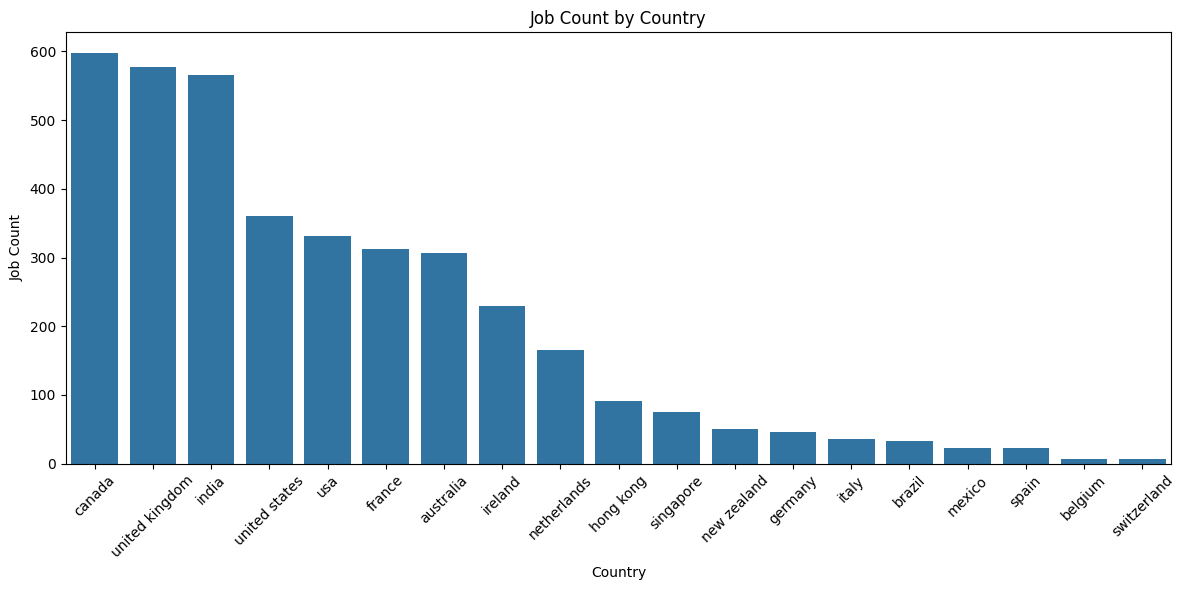

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for job count by country
job_counts = jobs_df['country'].value_counts().reset_index()
job_counts.columns = ['country', 'job_count']

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='job_count', data=job_counts)
plt.title('Job Count by Country')
plt.xlabel('Country')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

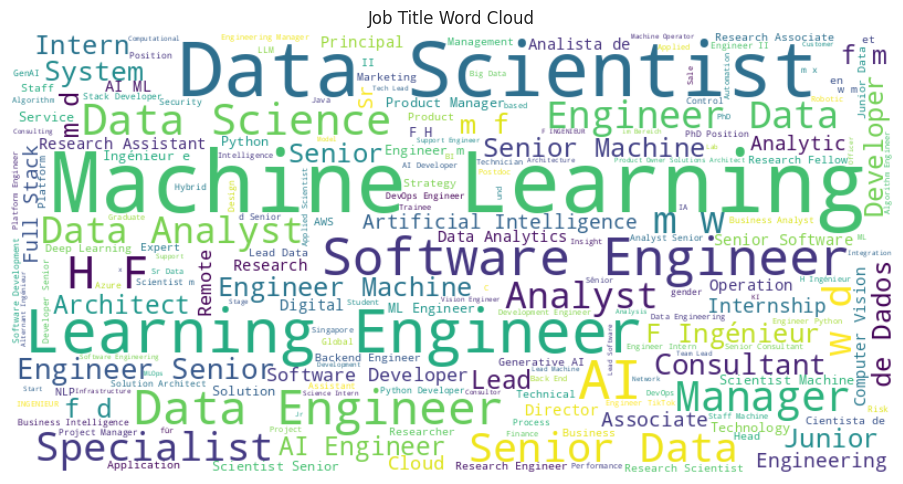

In [20]:
from wordcloud import WordCloud

# Generate word cloud for job titles
text = ' '.join(jobs_df['title'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

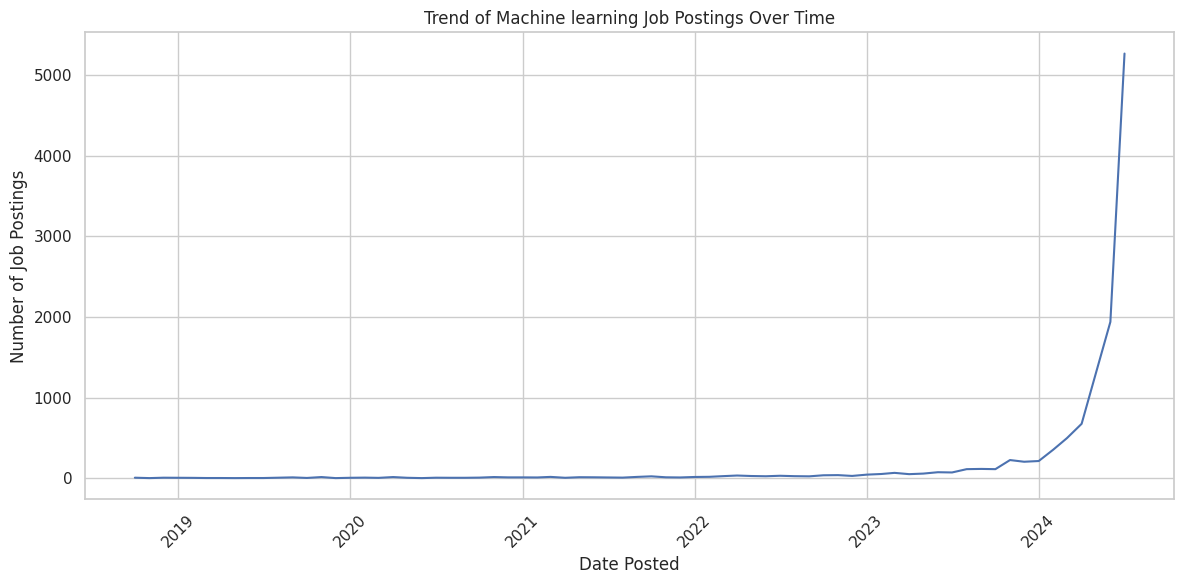

In [25]:
# Convert 'date_posted' to datetime
jobs_df['date_posted'] = pd.to_datetime(jobs_df['date_posted'], errors='coerce').copy()

# Drop rows with NaT in 'date_posted'
jobs_df = jobs_df.dropna(subset=['date_posted'])

# Group by month and year and count the number of job postings
job_trend = jobs_df['date_posted'].dt.to_period('M').value_counts().sort_index().reset_index()
job_trend.columns = ['date_posted', 'job_count']

# Convert 'date_posted' back to datetime for plotting
job_trend['date_posted'] = job_trend['date_posted'].dt.to_timestamp()

# Plot the trend of job postings over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_posted', y='job_count', data=job_trend)

# Customize the plot
plt.title('Trend of Machine learning Job Postings Over Time')
plt.xlabel('Date Posted')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

convert all currency to usd

In [26]:
unique_currencies = jobs_df['currency'].unique()
print(unique_currencies)

[nan 'ARS' 'AUD' 'EUR' 'BRL' 'CAD' 'USD' 'HKD' 'INR' 'MXN' 'NZD' 'SGD'
 'CHF' 'GBP' 'XAF']


In [23]:
# usd exchange range for reference only
exchange_rates = {
    'USD': 1,
    'EUR': 1.09,
    'GBP': 1.29,
    'CAD': 0.72,
    'INR': 0.012,
    'JPY': 0.009,
    'AUD': 0.65,
    'CHF': 1.12,
    'CNY': 0.20,
    'HKD': 0.13,
    'NZD': 0.69,
    'SGD': 0.75,
    'MXN': 0.05,
    'BRL': 0.19,
    'XAF': 0.0017,
    'ARS': 0.0011
    }

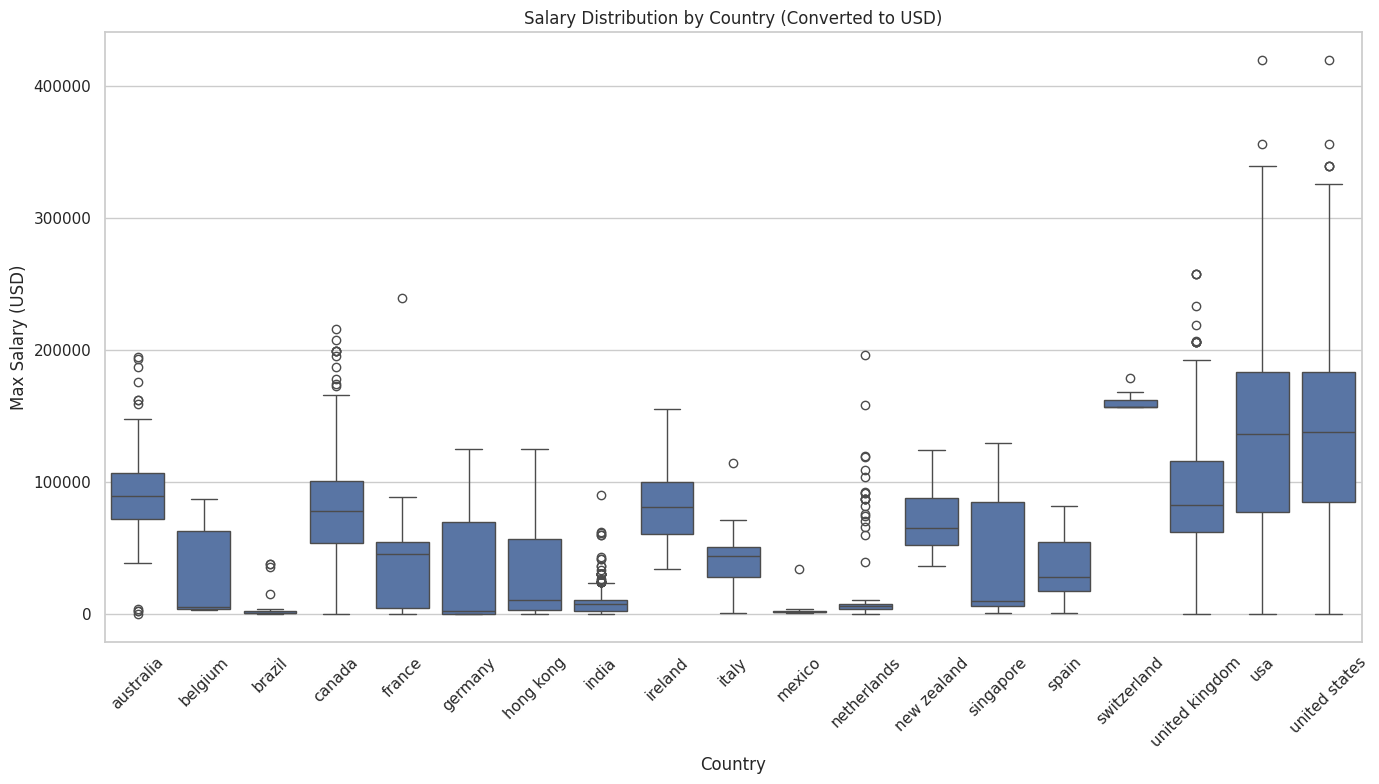

In [24]:
jobs_df['min_amount'] = pd.to_numeric(jobs_df['min_amount'], errors='coerce')
jobs_df['max_amount'] = pd.to_numeric(jobs_df['max_amount'], errors='coerce')

# Drop rows with NaN values in 'min_amount' or 'max_amount'
jobs_df = jobs_df.dropna(subset=['min_amount', 'max_amount'])

# Convert salaries to USD
def convert_to_usd(row):
    exchange_rate = exchange_rates.get(row['currency'], 1)
    row['min_amount_usd'] = row['min_amount'] * exchange_rate
    row['max_amount_usd'] = row['max_amount'] * exchange_rate
    return row

jobs_df = jobs_df.apply(convert_to_usd, axis=1)

# Plot the Salary Distribution by Country
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
bar_plot = sns.boxplot(x='country', y='max_amount_usd', data=jobs_df)

# Customize the plot
plt.title('Salary Distribution by Country (Converted to USD)')
plt.xlabel('Country')
plt.ylabel('Max Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

scatter plot for

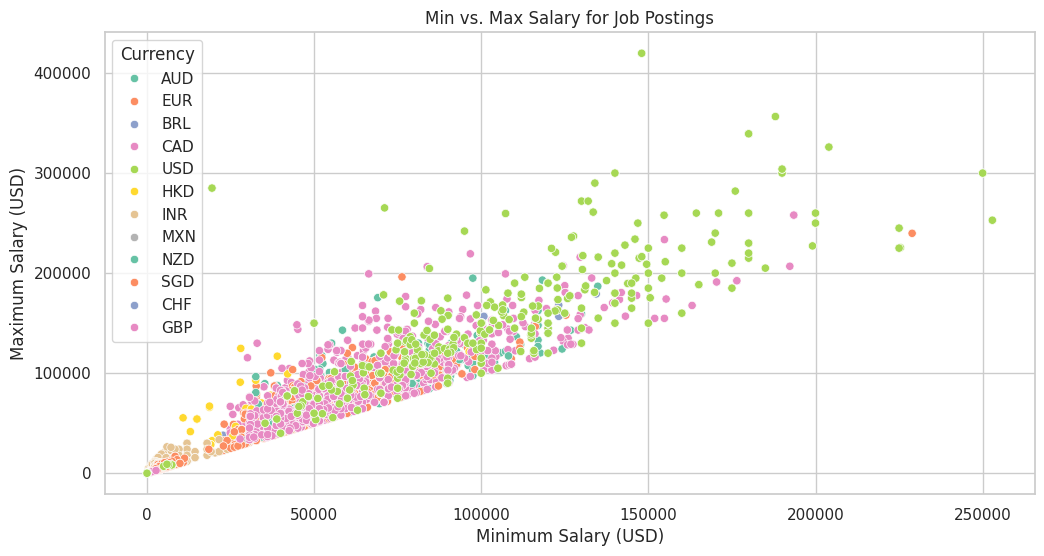

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='min_amount_usd', y='max_amount_usd', data=jobs_df, hue='currency', palette='Set2')

# Customize the plot
plt.title('Min vs. Max Salary for Job Postings')
plt.xlabel('Minimum Salary (USD)')
plt.ylabel('Maximum Salary (USD)')
plt.legend(title='Currency')
plt.grid(True)

# Show the plot
plt.show()

pie for propotion of job

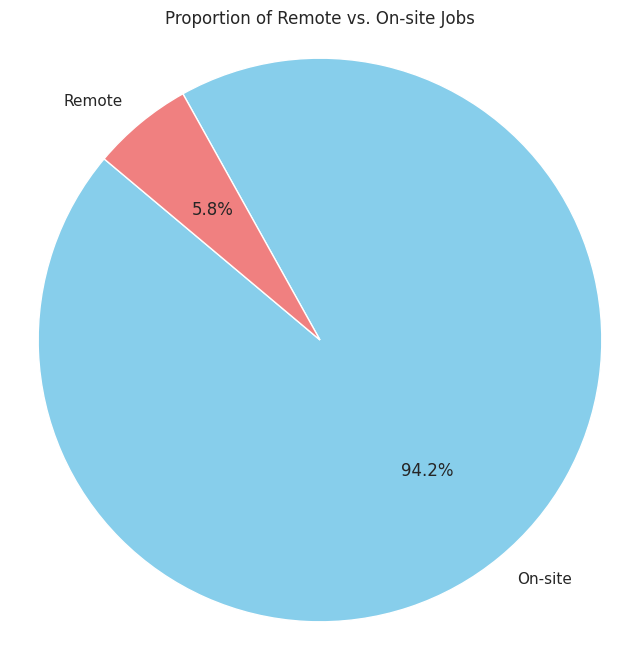

In [34]:
remote_vs_onsite_counts = jobs_df['is_remote'].value_counts()

# Labels for the pie chart
labels = ['On-site','Remote']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(remote_vs_onsite_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Remote vs. On-site Jobs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [32]:
unique_listings = jobs_df['listing_type'].unique()
print(unique_listings)

['organic' 'sponsored']


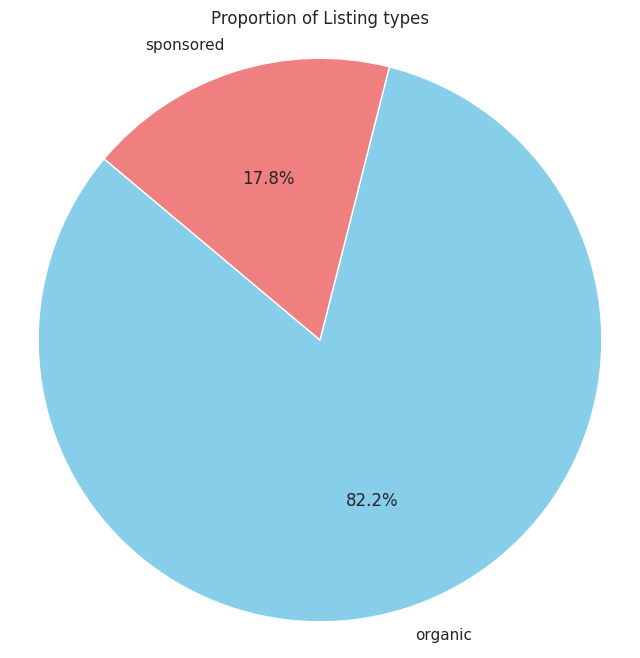

In [33]:
remote_vs_onsite_counts = jobs_df['listing_type'].value_counts()

# Labels for the pie chart
labels = ['organic', 'sponsored']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(remote_vs_onsite_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Listing types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

Job Density by Location: Uses geographical data to show the density of job postings in different regions on a map.

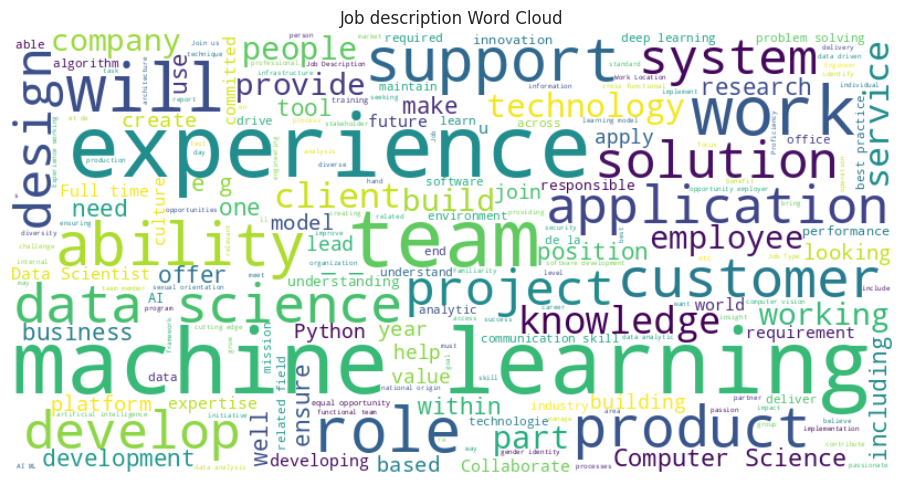

In [36]:

# Generate word cloud for job titles
text = ' '.join(jobs_df['description'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job description Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
unique_title_count = jobs_df['title'].nunique()
print(unique_title_count)

2736


In [18]:
listing_type_counts = jobs_df['listing_type'].value_counts()
print(listing_type_counts)

listing_type
organic      3152
sponsored     687
Name: count, dtype: int64


In [26]:
print(jobs_df.sort_values(by='max_amount_usd',ascending=0))

                                                   title  \
10578        Senior GPU Supercomputer Scheduler Engineer   
10991        Senior GPU Supercomputer Scheduler Engineer   
10980  Reliability, Availability and Serviceability E...   
10566  Reliability, Availability and Serviceability E...   
10577          Senior Developer Technology Engineer - AI   
...                                                  ...   
5275     Machine Learning with Python Trainer(Freelance)   
4638   Traditional Chinese Language Data and Quality ...   
4694           Junior Data Evaluator- Simplified Chinese   
5026           Open AI Assistance Programmer (part-time)   
5177                Data Insights & Analytics Specialist   

                             company         location date_posted  \
10578                         NVIDIA  Santa Clara, CA  2023-04-26   
10991                         NVIDIA  Santa Clara, CA  2023-04-26   
10980                         NVIDIA  Santa Clara, CA  2023-11-16   
105

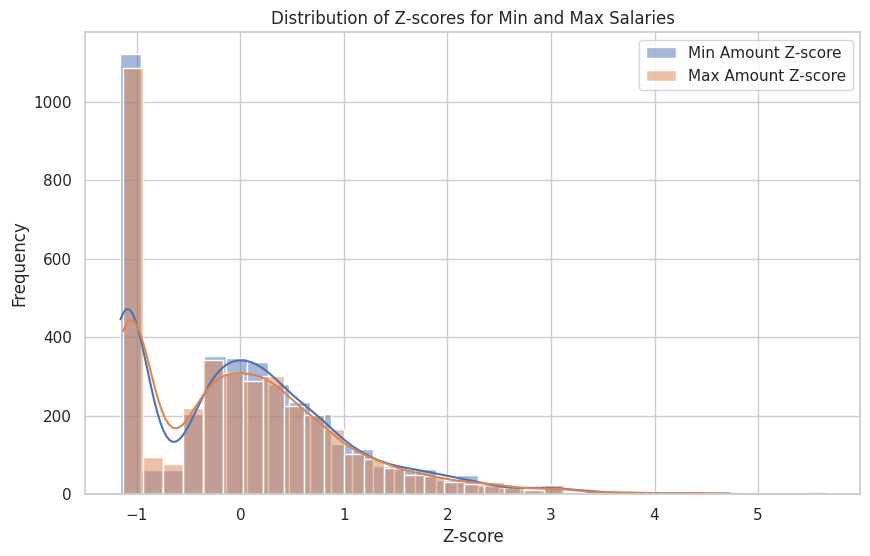

In [31]:
# zscore for min and max max_amount_usd
from scipy import stats
jobs_df['min_amount_usd_zscore'] = stats.zscore(jobs_df['min_amount_usd'])
jobs_df['max_amount_usd_zscore'] = stats.zscore(jobs_df['max_amount_usd'])
jobs_df.head()
# show a graph for min_amount_usd_zscore and max_amount_usd_zscore

# Plot the distribution of z-scores
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['min_amount_usd_zscore'], label='Min Amount Z-score', kde=True)
sns.histplot(jobs_df['max_amount_usd_zscore'], label='Max Amount Z-score', kde=True)

# Customize the plot
plt.title('Distribution of Z-scores for Min and Max Salaries')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


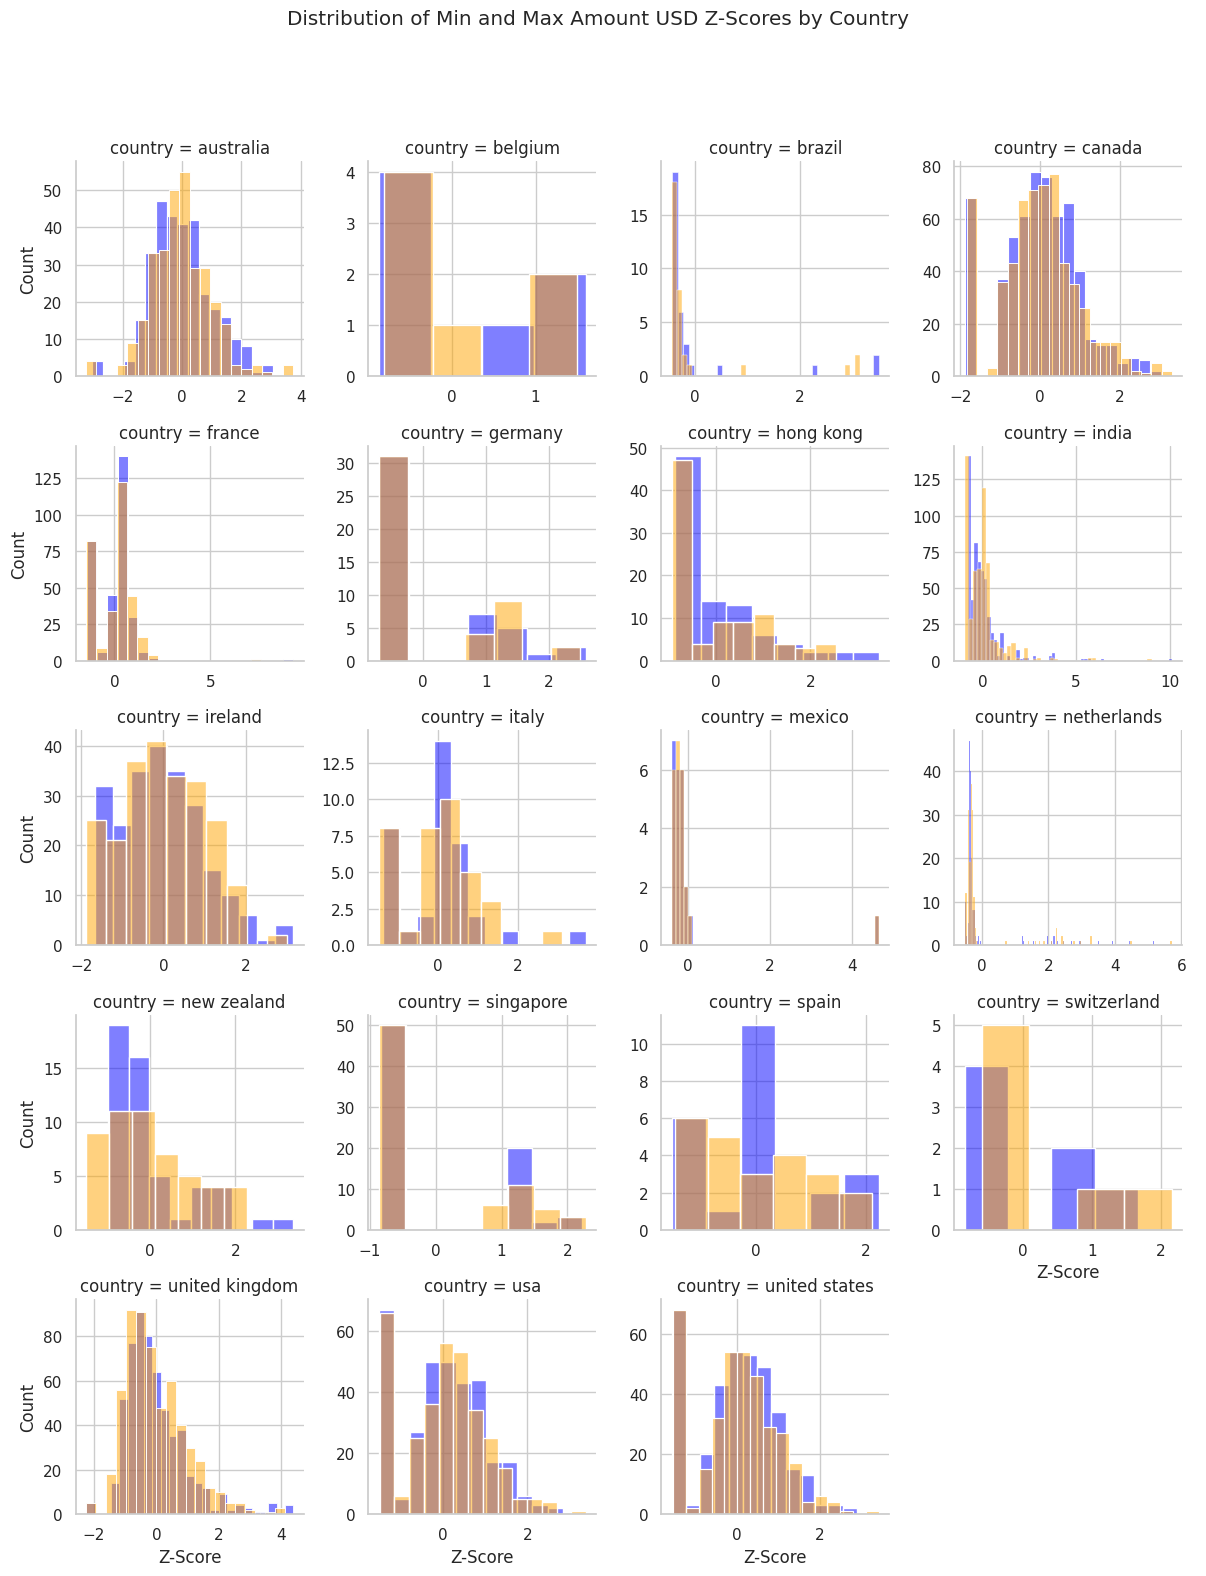

In [40]:
# zscore by country to find out the salart distribution

# Create a faceted histogram
g = sns.FacetGrid(jobs_df, col="country", col_wrap=4, sharex=False, sharey=False)

# Plot both min and max z-scores with transparency
g.map(sns.histplot, "min_amount_usd_zscore_country", color="blue", alpha=0.5, )
g.map(sns.histplot, "max_amount_usd_zscore_country", color="orange", alpha=0.5,)

# Customize the plot
g.set_axis_labels("Z-Score", "Count")
g.fig.suptitle("Distribution of Min and Max Amount USD Z-Scores by Country", y=1.05)
g.add_legend()
plt.tight_layout()

# Show the plot
plt.show()
